In [3]:
# Basic libraries
import numpy as np
import matplotlib.pyplot as plt

# Dataset
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [4]:
# Load only people with at least 70 images to keep it simple
lfw_dataset = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

X = lfw_dataset.images   # shape: (samples, height, width)
y = lfw_dataset.target   # integer labels

print("Image Shape:", X.shape)
print("Classes:", lfw_dataset.target_names)


Image Shape: (1288, 50, 37)
Classes: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


In [5]:
# Normalize pixel values to 0–1
X = X / 255.0

# Add channel dimension for CNN: (samples, height, width, channels)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

# One-hot encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42
)


In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(X.shape[1], X.shape[2], 1)),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 35, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 7, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4928)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       630,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 650,631 (2.48 MB)

 Trainable params: 650,631 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.3762 - loss: 1.8005 - val_accuracy: 0.4029 - val_loss: 1.6748
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.3981 - loss: 1.7329 - val_accuracy: 0.4029 - val_loss: 1.6654
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.3981 - loss: 1.7389 - val_accuracy: 0.4029 - val_loss: 1.6733
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.3993 - loss: 1.7229 - val_accuracy: 0.4029 - val_loss: 1.6743
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.3968 - loss: 1.7385 - val_accuracy: 0.4029 - val_loss: 1.6690
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.3981 - loss: 1.7400 - val_accuracy: 0.4029 - val_loss: 1.7149
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.3993 - loss: 1.7334 - val_accuracy: 0.4029 - val_loss: 1.6730
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.3981 - loss: 1.7426 - val_accuracy: 0.4029 - v

In [9]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4612 - loss: 1.6254
Test Accuracy: 46.12%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


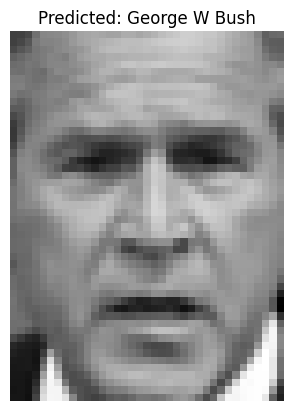

In [10]:
# Pick one test image
idx = 5
test_image = X_test[idx].reshape(1, X.shape[1], X.shape[2], 1)
prediction = model.predict(test_image)
predicted_label = encoder.inverse_transform([np.argmax(prediction)])

plt.imshow(X_test[idx].reshape(X.shape[1], X.shape[2]), cmap='gray')
plt.title(f"Predicted: {lfw_dataset.target_names[predicted_label[0]]}")
plt.axis('off')
plt.show()
